In [30]:
%matplotlib inline
from snownlp import SnowNLP
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In this python notebook, we use the SnowNLP package the count the sentiment for each article in xiakedao and bullpianot for US and China trade.

In [3]:
#Load the Data 
x_trade = pd.read_excel("/Users/martin/Desktop/lab/xiake_trade.xlsx",encoding="gbk") 
b_trade = pd.read_excel("/Users/martin/Desktop/lab/bull_trade.xlsx",encoding="gbk") 

Give a look for the data

In [4]:
x_trade.head()

,title,date_published,text
0,我这有个一带一路，特朗普你考虑考虑？,2017-04-05,习主席即将开启访美之行。说实话，中美双方这么快就实现元首访问，速度应该是超出了很多人的预期。...
1,首次习特会，这四字最为要害,2017-04-09,中美两国国家元首在“海湖庄园”进行的会晤，恐怕是这几天地球上最抓眼球的事情之一（另一件则是会...
2,昨天结束的这件事，足以写入中美历史,2017-06-23,当地时间21日，中美双方在华盛顿举行了首轮外交安全对话。 今年4月，在海湖庄园峰会上，习近平...
3,中美首轮全面经济对话，外媒居然说“谈崩了”？,2017-07-21,昨天晚上，岛叔的不少微信群里开始流传一幅截图，说“刚刚”！因美方不满意首轮中美全面经济对话，...
4,这一次，美国真的要向中国“开战”？,2017-08-15,北京时间的今天，特朗普终于签下行政令，责成美国贸易代表对中国的“不公平贸易行为”发起调查，也...


In [6]:
#Sort the dataset by date
b_trade = b_trade.sort_values(by='date_published')

In [6]:
b_trade.head()

,title,date_published,text
0,特朗普的握手神功，竟然这次没在习总面前上演,2017-04-06,这是历史性的握手！特朗普上前一步，伸出右手，握住了中国领导人伸过来的手。竟然，没有太戏剧性的...
1,第一次习特会，意味深长的八个细节,2017-04-07,虽然叙利亚打得火热，但海湖庄园一片祥和。第一次习特会在全程微笑中结束了，会谈、晚宴、聊天、散...
2,世界被弄晕了，史上最反华的川普，突然成了最亲华的总统,2017-04-17,这个世界变化快，但再快，估计都赶不上特朗普（川普）的那张表情丰富的脸。他曾经可能是史上最反华...
3,就在这个月，世界格局发生了重大深远的变化,2017-04-25,（一）就在这个四月，世界格局发生了重大深远变化。特朗普也突然变得非常可爱了。转折点，就是本月...
4,纽约时报都急了：特朗普，你到底是不是中国的卧底？,2017-06-13,在美国政坛，批评一个政治人士的最高境界，就是说他是外国特务。譬如，在去年大选时，很多人批评希...


In [22]:
#Create an empty list to store sentiment of each xiake article
sentiment = [None]*x_trade.shape[0]

for i in range(x_trade.shape[0]):
    s = SnowNLP(x_trade.text.iloc[i])
    g = SnowNLP(x_trade.title.iloc[i])
    a = (g.sentiments)*10 #Calculate the sentiment for titles and give it a weight of 10
    b = 0
    #use this for loop to calcualte the sentiment of each sentences in the article
    for j in range(len(s.sentences)):
        k=SnowNLP(s.sentences[j]) 
        a+=k.sentiments #Add the sentiment for each sentence together 
        b = a/(len(s.sentences)+10) #Take the average 
    sentiment[i]=b   #Store the sentiment for each article 

In [23]:
#Create an empty list to store sentiment of each bull piano article
b_sentiment = [None]*(b_trade.shape[0])

for i in range(b_trade.shape[0]):
    s = SnowNLP(b_trade.text.iloc[i])
    g = SnowNLP(b_trade.title.iloc[i])
    c = (g.sentiments)*10 
    d = 0
    #use this for loop to calcualte the sentiment of each sentences in the article
    for j in range(len(s.sentences)):
        q=SnowNLP(s.sentences[j])
        c+=q.sentiments
        d = c/(len(s.sentences)+10)   
    b_sentiment[i]=d

In [24]:
#Change the data type for plotting 
sentiment1= np.array(sentiment)
sentiment2 = np.array(b_sentiment)

In [35]:
#Show the sentiment for first 5 articles for xiake
sentiment1[0:5]

array([0.75154369, 0.77151671, 0.7524585 , 0.67795165, 0.64542687])

In [38]:
#Show the sentiment for last 5 articles for bull piano
sentiment2[b_trade.shape[0]-6:b_trade.shape[0]-1]

array([0.64174907, 0.65894734, 0.66959947, 0.58319015, 0.66150477])

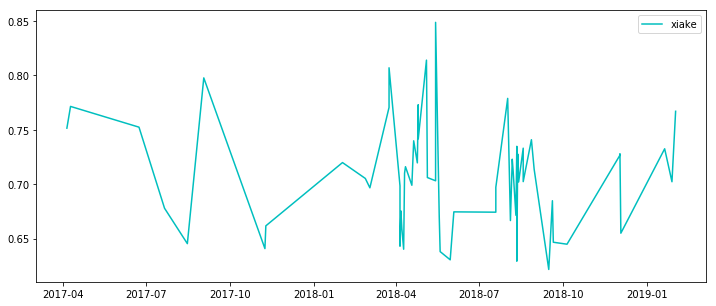

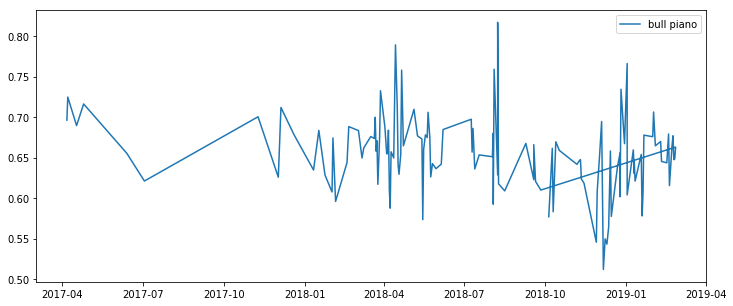

In [32]:
#A line plot
plt.figure(figsize=(12,5))
plt.plot(x_trade.date_published,sentiment1,label='xiake',c='c')
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(b_trade.date_published,sentiment2,label='bull piano')
plt.legend()
plt.show()